In [2]:
%load_ext autoreload
%autoreload 2

import os
import os.path as osp
import sys

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import wandb

sys.path.append("../src")

from plot_utils import process_results, execute_df_rollout,execute_plot, find_max_train_save

api = wandb.Api(
    overrides={"entity": "kobybibas", "project": "pnml_for_active_learning"}
)
out_dir = "../outputs/analysis"
os.makedirs(out_dir, exist_ok=True)

# Project is specified by
runs = api.runs("kobybibas/pnml_for_active_learning")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
! wandb login

wandb: Currently logged in as: kobybibas. Use `wandb login --relogin` to force relogin


In [4]:
random_runs = [
    "kobybibas/pnml_for_active_learning/2fafuyfd",
    "kobybibas/pnml_for_active_learning/2omu5s0f",
    "kobybibas/pnml_for_active_learning/2ouexbd0",
    "kobybibas/pnml_for_active_learning/1pik2x1e",
    "kobybibas/pnml_for_active_learning/lamt1no9",
    "kobybibas/pnml_for_active_learning/1mrnydlf",
]
bald_runs = [
    "kobybibas/pnml_for_active_learning/3dowhzcw",
    "kobybibas/pnml_for_active_learning/3q4i00ny",
    "kobybibas/pnml_for_active_learning/2tghe9mz",
    "kobybibas/pnml_for_active_learning/1brixcy5",
    "kobybibas/pnml_for_active_learning/35xkjwu0",
    "kobybibas/pnml_for_active_learning/3brs09kl",
]

kmean_runs = [
    "kobybibas/pnml_for_active_learning/3iymd7uz",
    "kobybibas/pnml_for_active_learning/ptyiq2cb",
    "kobybibas/pnml_for_active_learning/jqmukw4a",
    "kobybibas/pnml_for_active_learning/2vmj3i26",
    "kobybibas/pnml_for_active_learning/1qyws58i",
    "kobybibas/pnml_for_active_learning/1dqp2aks",
]

epig_runs = [
    "kobybibas/pnml_for_active_learning/3c7cwjpa",
    "kobybibas/pnml_for_active_learning/3rx5ri98",
    "kobybibas/pnml_for_active_learning/2jb6btip",
    "kobybibas/pnml_for_active_learning/ljh5zcgb",
    "kobybibas/pnml_for_active_learning/1g8k01tm",
]

pnml_runs = [
    "kobybibas/pnml_for_active_learning/1xpj5olh",
    "kobybibas/pnml_for_active_learning/2ilnc6yz",
    "kobybibas/pnml_for_active_learning/h4wwk1yd",
    "kobybibas/pnml_for_active_learning/rxhgiqpj",
    "kobybibas/pnml_for_active_learning/251lciqn",
]

random_dfs = process_results(api=api, run_list=random_runs, use_ood=False)
bald_dfs = process_results(api=api, run_list=bald_runs, use_ood=False)
kmean_dfs = process_results(api=api, run_list=kmean_runs, use_ood=False)
epig_dfs = process_results(api=api, run_list=epig_runs, use_ood=False)
pnml_dfs = process_results(api=api, run_list=pnml_runs, use_ood=False)

kobybibas/pnml_for_active_learning/2fafuyfd
Index(['_step', 'training_set_size', 'test_acc', 'test_loss'], dtype='object')
kobybibas/pnml_for_active_learning/2omu5s0f
Index(['_step', 'training_set_size', 'test_acc', 'test_loss'], dtype='object')
kobybibas/pnml_for_active_learning/2ouexbd0
Index(['_step', 'training_set_size', 'test_acc', 'test_loss'], dtype='object')
kobybibas/pnml_for_active_learning/1pik2x1e
Index(['_step', 'training_set_size', 'test_acc', 'test_loss'], dtype='object')
kobybibas/pnml_for_active_learning/lamt1no9
Index(['_step', 'training_set_size', 'test_acc', 'test_loss'], dtype='object')
kobybibas/pnml_for_active_learning/1mrnydlf
Index(['_step', 'training_set_size', 'test_acc', 'test_loss'], dtype='object')
kobybibas/pnml_for_active_learning/3dowhzcw
Index(['_step', 'training_set_size', 'test_acc', 'test_loss'], dtype='object')
kobybibas/pnml_for_active_learning/3q4i00ny
Index(['_step', 'training_set_size', 'test_acc', 'test_loss'], dtype='object')
kobybibas/pnml_f

In [5]:
rolling_size = 4
random_res = execute_df_rollout(random_dfs, rolling_size=rolling_size)
bald_res = execute_df_rollout(bald_dfs, rolling_size=rolling_size)
kmean_res = execute_df_rollout(kmean_dfs, rolling_size=rolling_size)
epig_res = execute_df_rollout(epig_dfs, rolling_size=rolling_size)
pnml_res = execute_df_rollout(pnml_dfs, rolling_size=rolling_size)
plot_list = [
    (random_res, "Random"),
    (bald_res, "Bald"),
    (kmean_res, "Core-set"),
    (epig_res, "EPIG (UAL)"),
    (pnml_res, "DIAL"),
]

In [6]:
row = find_max_train_save(pnml_res, bald_res)
print(100 * row.training_set_size_left / row.training_set_size_right)
print(row)


89.01734104046243
training_set_size_left     308.000000
test_acc_left                0.536880
test_acc_round               0.537000
training_set_size_right    346.000000
test_acc_right               0.537212
Name: 313, dtype: float64


Random
Bald
Core-set
EPIG
DIAL
EMNIST OOD


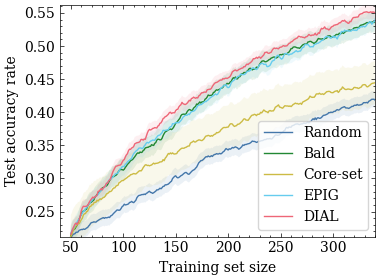

In [7]:
plt.style.use(["science", "bright", "no-latex"])
fig, ax = plt.subplots(1, 1, dpi=100, figsize=(4, 3))
fig, ax = execute_plot(plot_list, fig, ax)
print("EMNIST OOD")
# ax.get_legend().remove()
ax.set_xlim(40, 340)
plt.tight_layout()
plt.savefig(osp.join(out_dir, "emnist_ood.pdf"))
plt.show()


In [8]:
eps = 0.01
acc_values = [0.4, 0.3, 0.25]
for dict_df, method in plot_list:
    print(method)
    df = dict_df["mean"]

    for acc in acc_values:
        print(f"{acc}\t {df[(df > acc - eps ) & (df <= acc )].index[0]}")

Random
0.4	 281
0.3	 140
0.25	 80
Bald
0.4	 154
0.3	 85
0.25	 59
Core-set
0.4	 221
0.3	 96
0.25	 62
EPIG
0.4	 157
0.3	 84
0.25	 59
DIAL
0.4	 138
0.3	 84
0.25	 59


In [9]:
print([plot_list[i][0]["mean"].loc[300] for i in range(len(plot_list))])

[0.40026666666666666, 0.513925, 0.42953749999999996, 0.51471875, 0.529855]


In [10]:
eps = 0.01
acc_values = [0.65]
for dict_df, method in plot_list:
    print(method)
    df = dict_df["mean"]
    try:
        for acc in acc_values:
            print(f"{acc}\t {df[(df > acc - eps ) & (df <= acc )].index[0]}")
    except:
        pass

Random
Bald
Core-set
EPIG
DIAL
